In [1]:
pip install pillow numpy matplotlib scikit-learn


In [15]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ========= CONFIGURE THIS =========
IMAGE_DIR = "E:/Tympanoplasty"   # <--- CHANGE THIS
N_COLORS_PER_IMAGE = 6
MAX_PIXELS_PER_IMAGE = 150_000
RANDOM_STATE = 42
# ==================================


In [16]:
print(os.listdir(IMAGE_DIR))

['House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 17m57s].png', 'House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 18m51s].png', 'House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 20m47s].png', 'House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 21m19s].png', 'House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 23m28s].png', 'House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 31m08s].png', 'House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 32m27s].png', 'Hous

In [17]:
def load_image_pixels(path, max_pixels=MAX_PIXELS_PER_IMAGE):
    img = Image.open(path).convert("RGB")
    arr = np.array(img)
    pixels = arr.reshape(-1, 3).astype(np.float32)

    if len(pixels) > max_pixels:
        idx = np.random.choice(len(pixels), max_pixels, replace=False)
        pixels = pixels[idx]

    return pixels


def get_dominant_colors(pixels, n_colors=N_COLORS_PER_IMAGE):
    kmeans = KMeans(
        n_clusters=n_colors,
        random_state=RANDOM_STATE,
        n_init="auto"
    )
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_.astype(int)
    counts = np.bincount(labels, minlength=n_colors)

    idx_sorted = np.argsort(-counts)
    return centers[idx_sorted], counts[idx_sorted]


def display_color_bar(colors, counts, title=None):
    total = counts.sum()
    ratios = counts / total

    bar_width = 800
    bar_height = 80
    bar = np.zeros((bar_height, bar_width, 3), dtype=np.uint8)

    start = 0
    for color, ratio in zip(colors, ratios):
        end = start + int(ratio * bar_width)
        bar[:, start:end, :] = color
        start = end
    bar[:, start:, :] = colors[-1]

    plt.figure(figsize=(8, 2))
    plt.imshow(bar)
    plt.title(title)
    plt.axis("off")
    plt.show()


Found 10 PNG images.

=== Image: House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 17m57s].png ===
Dominant colors:
  RGB (201, 36, 5)  -> 29.6%
  RGB (63, 12, 3)  -> 21.3%
  RGB (138, 24, 5)  -> 19.3%
  RGB (206, 86, 39)  -> 15.3%
  RGB (216, 136, 85)  -> 12.5%
  RGB (239, 213, 195)  ->  2.1%


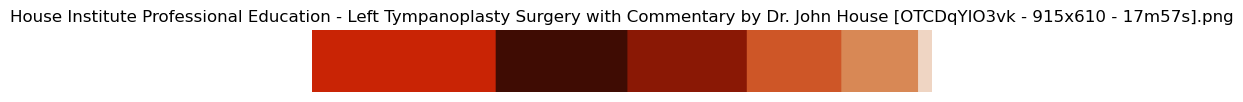


=== Image: House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 18m51s].png ===
Dominant colors:
  RGB (210, 29, 1)  -> 31.9%
  RGB (89, 14, 2)  -> 18.5%
  RGB (151, 31, 7)  -> 17.4%
  RGB (230, 71, 24)  -> 12.3%
  RGB (221, 119, 69)  -> 10.2%
  RGB (234, 169, 118)  ->  9.7%


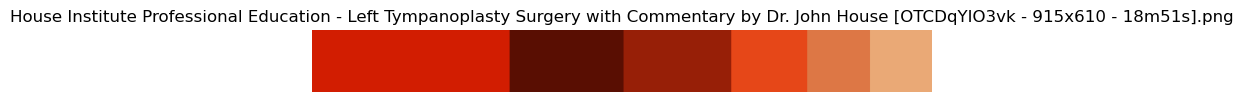


=== Image: House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 20m47s].png ===
Dominant colors:
  RGB (212, 36, 3)  -> 20.6%
  RGB (230, 157, 89)  -> 18.1%
  RGB (248, 195, 127)  -> 17.2%
  RGB (209, 101, 41)  -> 16.2%
  RGB (92, 15, 2)  -> 14.0%
  RGB (152, 35, 6)  -> 13.9%


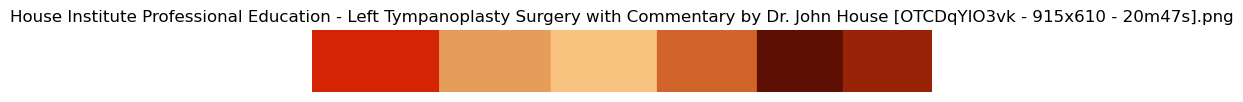


=== Image: House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 21m19s].png ===
Dominant colors:
  RGB (200, 31, 3)  -> 27.4%
  RGB (238, 47, 7)  -> 20.7%
  RGB (142, 24, 3)  -> 15.9%
  RGB (227, 98, 47)  -> 14.6%
  RGB (74, 10, 1)  -> 14.5%
  RGB (237, 152, 104)  ->  6.9%


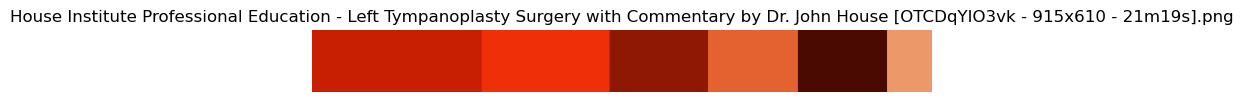


=== Image: House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 23m28s].png ===
Dominant colors:
  RGB (53, 7, 1)  -> 26.2%
  RGB (193, 29, 2)  -> 25.7%
  RGB (128, 24, 4)  -> 25.1%
  RGB (194, 82, 35)  -> 14.6%
  RGB (225, 130, 81)  ->  7.7%
  RGB (244, 228, 215)  ->  0.6%


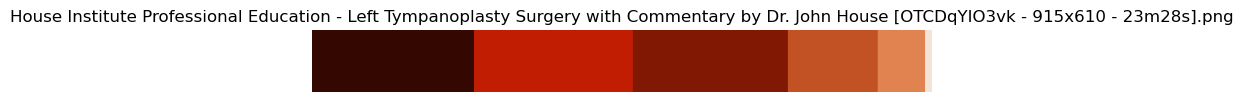


=== Image: House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 31m08s].png ===
Dominant colors:
  RGB (251, 195, 130)  -> 22.2%
  RGB (207, 63, 17)  -> 21.1%
  RGB (226, 110, 50)  -> 19.2%
  RGB (241, 157, 91)  -> 18.3%
  RGB (149, 34, 7)  -> 11.0%
  RGB (254, 234, 186)  ->  8.2%


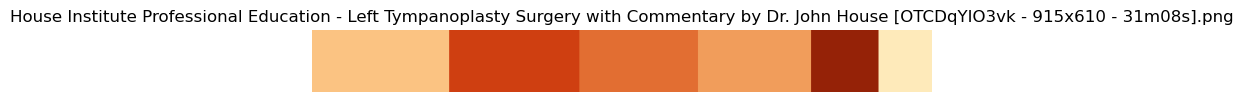


=== Image: House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 32m27s].png ===
Dominant colors:
  RGB (254, 202, 138)  -> 23.8%
  RGB (255, 240, 178)  -> 22.6%
  RGB (229, 50, 8)  -> 18.9%
  RGB (249, 161, 98)  -> 17.7%
  RGB (244, 107, 47)  -> 13.5%
  RGB (104, 21, 2)  ->  3.5%


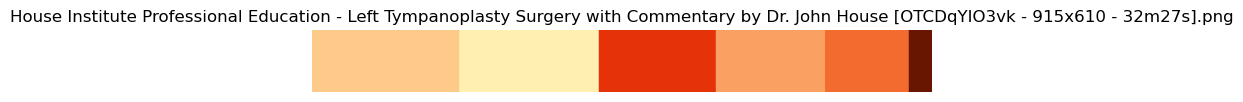


=== Image: House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 36m53s].png ===
Dominant colors:
  RGB (169, 54, 16)  -> 24.1%
  RGB (247, 168, 106)  -> 21.2%
  RGB (230, 113, 58)  -> 20.7%
  RGB (238, 61, 16)  -> 15.0%
  RGB (97, 21, 3)  ->  9.7%
  RGB (253, 216, 165)  ->  9.3%


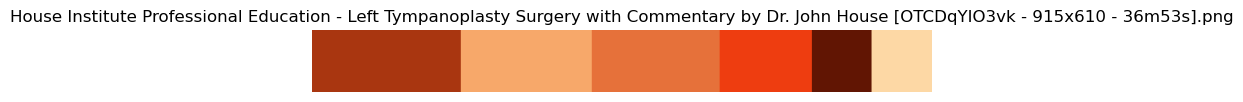


=== Image: House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 41m16s].png ===
Dominant colors:
  RGB (157, 29, 5)  -> 29.7%
  RGB (230, 37, 4)  -> 26.7%
  RGB (237, 89, 40)  -> 15.7%
  RGB (239, 142, 88)  -> 10.8%
  RGB (81, 18, 5)  -> 10.7%
  RGB (251, 211, 162)  ->  6.3%


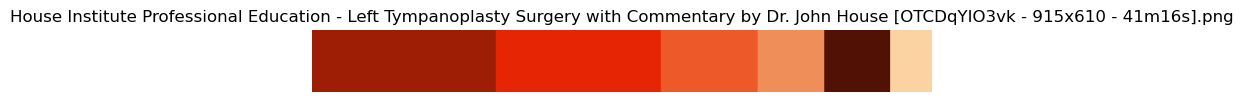


=== Image: House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House [OTCDqYIO3vk - 915x610 - 43m31s].png ===
Dominant colors:
  RGB (243, 40, 5)  -> 39.2%
  RGB (245, 82, 34)  -> 20.0%
  RGB (245, 134, 76)  -> 14.8%
  RGB (182, 30, 6)  -> 12.0%
  RGB (252, 187, 127)  -> 11.9%
  RGB (52, 7, 3)  ->  2.1%


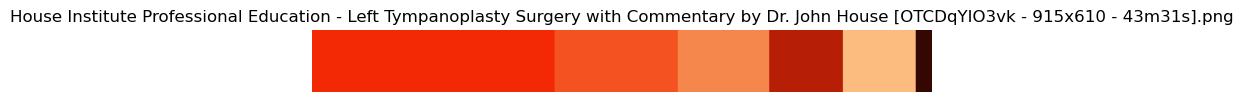

In [18]:
image_paths = sorted(glob.glob(os.path.join(IMAGE_DIR, "*.png")))
print(f"Found {len(image_paths)} PNG images.")

all_pixels = []

for path in image_paths:
    fname = os.path.basename(path)
    print("\n=== Image:", fname, "===")

    pixels = load_image_pixels(path)
    all_pixels.append(pixels)

    colors, counts = get_dominant_colors(pixels)

    # Print RGB + %
    total = counts.sum()
    print("Dominant colors:")
    for c, cnt in zip(colors, counts):
        pct = 100 * cnt / total
        print(f"  RGB {tuple(c)}  -> {pct:4.1f}%")

    # Show color spectrum bar
    display_color_bar(colors, counts, title=fname)



=== Combined Palette (All Images) ===
  RGB (226, 42, 7) -> 25.2%
  RGB (160, 33, 7) -> 20.2%
  RGB (225, 104, 50) -> 17.9%
  RGB (243, 166, 104) -> 15.5%
  RGB (76, 13, 2) -> 13.0%
  RGB (253, 221, 165) ->  8.2%


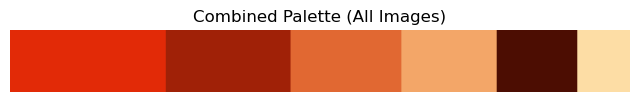

In [19]:
print("\n=== Combined Palette (All Images) ===")

all_pixels_concat = np.vstack(all_pixels)
comb_colors, comb_counts = get_dominant_colors(
    all_pixels_concat,
    n_colors=N_COLORS_PER_IMAGE
)

# Print combined colors
total_comb = comb_counts.sum()
for c, cnt in zip(comb_colors, comb_counts):
    pct = 100 * cnt / total_comb
    print(f"  RGB {tuple(c)} -> {pct:4.1f}%")

# Show combined palette bar
display_color_bar(comb_colors, comb_counts, 
                  title="Combined Palette (All Images)")


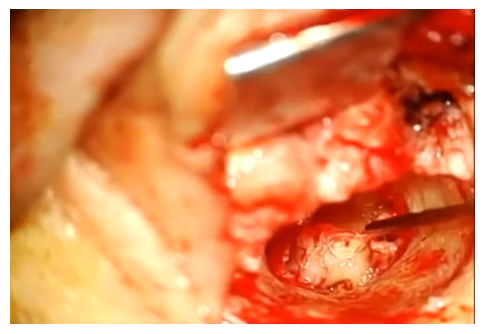

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "E:/Tympanoplasty/House Institute Professional Education - Left Tympanoplasty Surgery with Commentary by Dr. John House.png"  # change filename

img = Image.open(img_path)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.show()
